# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Matemática Para Machine Learning</font>

## Lab 4 - Reinforcement Learning (A Matemática da Aprendizagem Por Reforço)

### O Que é Reinforcement Learning?

Considere o jogo Breakout. Neste jogo você controla uma pá na parte inferior da tela e tem que disparar a bola de volta para limpar todos os tijolos na metade superior da tela. Cada vez que você bate em um tijolo, ele desaparece e sua pontuação aumenta - você recebe uma recompensa. Para aprender a jogar o Breakout, confira algumas dicas aqui: https://www.youtube.com/watch?v=JRAPnuwnpRs

Suponha que você queira ensinar uma rede neural a jogar este jogo. A entrada em sua rede seria imagens de tela, e a saída seria de três ações: esquerda, direita ou disparar (para iniciar a bola). Teria sentido tratá-lo como um problema de classificação - para cada tela de jogo você deve decidir, se você deve mover para a esquerda, direita ou disparar. Parece simples, mas então você precisa de exemplos de treinamento, e muitos deles. Claro que você poderia gravar sessões de jogos usando jogadores experientes, mas isso não é realmente como aprendemos. Nós apenas precisamos de feedback ocasional que fizemos a coisa certa e podemos descobrir todos os outros nós mesmos.

<img src="images/breakout.png">

Esta é a tarefa que o aprendizado por reforço tenta resolver. O aprendizado por reforço situa-se entre a aprendizagem supervisionada e não supervisionada. No aprendizado supervisionado, usamos um rótulo alvo para cada exemplo de treinamento e na aprendizagem sem supervisão não tem rótulos. No aprendizado por reforço, temos rótulos dispersos e atrasados, as recompensas. Com base apenas nas recompensas, o agente deve aprender a comportar-se no ambiente.

Embora a ideia seja bastante intuitiva, na prática há inúmeros desafios. Por exemplo, quando você bate em um tijolo e ganha uma recompensa no jogo Breakout, muitas vezes não tem nada a ver com as ações que você fez antes de obter a recompensa. Todo o trabalho duro já foi feito, quando você colocou a pá corretamente e disparou a bola de volta. Isso é chamado de problema de atribuição de crédito - ou seja, qual das ações anteriores foi responsável por receber a recompensa e até que ponto.

Depois de ter descoberto uma estratégia para coletar um certo número de recompensas, você deve ficar com ela ou experimentar alguma coisa que possa resultar em recompensas ainda maiores? No jogo Breakout acima, uma estratégia simples é mover-se para a margem esquerda e esperar lá. Quando lançada, a bola tende a voar para a esquerda com mais frequência do que a direita e você conseguirá marcar com facilidade cerca de 10 pontos antes de morrer. Você ficará satisfeito com isso ou quer mais? Isso é chamado de dilema explore-exploit - você deve explorar a estratégia de trabalho conhecida ou explorar outras estratégias possivelmente melhores?

O aprendizado por reforço é um modelo importante de como nós (e todos os animais em geral) aprendemos. Elogios de nossos pais, notas na escola, salário no trabalho - estes são exemplos de recompensas. Problemas de atribuição de crédito e dilemas explore-exploit surgem todos os dias, tanto nos negócios como nos relacionamentos. É por isso que é importante estudar este problema, e os jogos formam uma sandbox maravilhosa para experimentar novas abordagens.

### Processo de Decisão de Markov

Agora, a questão é como você formaliza um problema de aprendizado por reforço, para que você possa raciocinar sobre ele? O método mais comum é representá-lo como um Processo de Decisão de Markov.

Suponha que você seja um agente, situado em um ambiente (por exemplo, o jogo Breakout). O ambiente está em certo estado (por exemplo, localização da pá, localização e direção da bola, existência de cada tijolo e assim por diante). O agente pode executar certas ações no ambiente (por exemplo, mover a pá para a esquerda ou para a direita). Essas ações às vezes resultam em uma recompensa (por exemplo, aumento na pontuação). As ações transformam o ambiente e conduzem a um novo estado, onde o agente pode executar outra ação, e assim por diante. As regras sobre como você escolhe essas ações são chamadas de política. O ambiente em geral é estocástico, o que significa que o próximo estado pode ser um pouco aleatório (por exemplo, quando você perde uma bola e lança uma nova, vai para uma direção aleatória).

<img src="images/mdp.png">

O conjunto de estados e ações, juntamente com as regras para a transição de um estado para outro, compõem um Processo de Decisão de Markov. Um episódio deste processo (por exemplo, um jogo) forma uma sequência finita de estados, ações e recompensas:

<img src="images/mdp2.png">

Aqui si representa o estado, ai é a ação e ri + 1 é a recompensa depois de executar a ação. O episódio termina com o estado terminal sn (por exemplo, "game over"). Um processo de decisão de Markov baseia-se na suposição de Markov, que a probabilidade de o próximo estado si + 1 depende apenas do estado atual si e da ação ai, mas não de estados ou ações anteriores.

## Discounted Future Reward

Para se comportar bem a longo prazo, precisamos levar em conta não só as recompensas imediatas, mas também as recompensas futuras que vamos conseguir. Como devemos fazer isso?

Dada uma série do processo de decisão de Markov, podemos calcular facilmente a recompensa total de um episódio:

<img src="images/reward1.png">

Dado que, a recompensa futura total a partir do ponto de tempo a seguir pode ser expressa como:

<img src="images/reward2.png">

Mas como o nosso ambiente é estocástico, nunca podemos ter certeza, se conseguiremos as mesmas recompensas na próxima vez que realizarmos as mesmas ações. Quanto mais no futuro nós vamos, mais pode divergir. Por esse motivo, é comum usar uma recompensa futura com desconto em vez disso:

<img src="images/reward3.png">

Aqui γ é o fator de desconto entre 0 e 1 - quanto mais no futuro a recompensa é, menos levamos em consideração. É fácil de ver, que a recompensa futura com desconto no tempo passo t pode ser expressa em termos da mesma coisa no tempo passo t + 1:

<img src="images/reward4.png">

Se definimos o fator de desconto γ = 0, nossa estratégia será míope e confiamos apenas nas recompensas imediatas. Se quisermos equilibrar entre recompensas imediatas e futuras, devemos definir fator de desconto para algo como γ = 0.9. Se o nosso ambiente for determinista e as mesmas ações sempre resultarão nas mesmas recompensas, então podemos definir o fator de desconto γ = 1.

Uma boa estratégia para um agente seria sempre escolher uma ação que maximize a recompensa futura (descontada).

### Elementos do Aprendizado por Reforço

Além do agente e do ambiente, pode-se identificar quatro subelementos principais de RL:

* Política - é um mapeamento de estados percebidos do ambiente para ações a serem tomadas quando nesses estados. A política é o núcleo de um agente de aprendizado por reforço, no sentido de que por si só é suficiente para determinar o comportamento. Talvez seja estocástico, especificando probabilidades para cada ação.


* Recompensas - Em cada etapa, o ambiente envia ao agente de aprendizado por reforço um único número chamado recompensa. O único objetivo do agente é maximizar a recompensa total que recebe a longo prazo. O sinal de recompensa define, portanto, quais são os sinais bons e ruins para o agente. Talvez seja uma função estocástica do estado e da ação.


* Função de valor - especifica, a grosso modo, que o valor de um estado é a quantidade total de recompensa que um agente pode esperar acumular no futuro, a partir desse estado. Enquanto as recompensas determinam a conveniência imediata e intrínseca dos estados ambientais, os valores indicam a conveniência a longo prazo dos estados após levar em consideração os estados que provavelmente seguirão e as recompensas disponíveis nesses estados. Por exemplo, um estado sempre pode gerar uma recompensa imediata baixa, mas ainda tem um valor alto, porque é seguido regularmente por outros estados que geram recompensas altas ou o inverso pode ser verdadeiro.


* Modelo do ambiente - imita o comportamento do ambiente, permitindo inferências sobre como o ambiente se comportará. Por exemplo, dado um estado e uma ação, o modelo pode prever o próximo estado resultante e a próxima recompensa. Os métodos para resolver problemas de aprendizado por reforço que usam modelos são chamados de métodos baseados em modelo, em oposição a métodos mais simples sem modelo, aprendizes de tentativa e erro.


As recompensas são, em certo sentido, primárias, enquanto os valores, como previsões de recompensas, são secundários. Sem recompensas, não poderia haver valores, e o único objetivo de estimar valores é obter mais recompensa. No entanto, são os valores que mais nos preocupam ao tomar e avaliar decisões.

### Algoritmo de Aprendizado Por Reforço Para Resolver o Jogo da Velha

Abordagem de aprendizado por reforço para resolver o jogo da velha:


* Configure a tabela de números, um para cada estado possível do jogo.

* Cada número será nossa estimativa mais recente de nossa probabilidade de vencer a partir desse estado.

* Essa estimativa é o valor do estado e a tabela inteira é a função de valor aprendido.

* Supondo que sempre jogamos Xs, então para todos os estados com 3 Xs seguidos (coluna e diagonal) a probabilidade de ganhar é 1,0

* E para todos os estados com 3 Os seguidos (coluna e diagonal), a probabilidade de vitória é de 0,0

* Definimos os valores iniciais de todos os outros estados para 0,5 (representando uma chance de 50% de vitória).

Em seguida, jogamos muitos jogos contra o oponente. Para selecionar nossos movimentos:

1. Examinamos os estados que resultariam de cada uma de nossas possíveis movimentações e procuramos seus valores atuais na tabela.

2. Na maioria das vezes nos movemos com avidez, selecionando a jogada que leva ao estado com o maior valor. (maior probabilidade de ganhar).

3. Ocasionalmente, selecionamos aleatoriamente dentre os outros movimentos. (Exploração)

4. Enquanto jogamos, mudamos os valores dos estados em que nos encontramos.

Depois de cada movimento "ganancioso", de A para B, atualizamos o valor de A para ficar mais próximo do valor de B.
Isso é alcançado usando a seguinte fórmula:

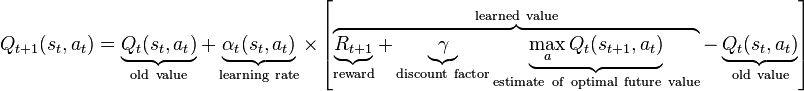

In [1]:
from IPython.display import Image
Image('images/qlearn.png')

### Implementando Aprendizagem Por Reforço em Python

Vamos construir e treinar um agente para encontrar o caminho mais curto entre a posição `(0, 0)` até o canto oposto `(Ny-1, Nx-1)` de uma grade retangular 2D no ambiente 2D de tamanho (Ny, Nx). Ou seja, o agente deverá encontrar o melhor caminho do canto superior esquerdo da grade, até o canto inferior direito.

O agente está restrito a se mover para subir / descer / esquerda / direita por 1 quadrado da grade por ação. O agente recebe uma penalidade de `-0,1` por cada ação que não atingir o estado terminal (para incentivar a busca por caminho mais curto) e uma recompensa de `100` ao atingir o estado terminal. O parâmetro de exploração do agente `epsilon` também decai por uma constante multiplicativa após cada episódio de treinamento. * As formas tabulares * do valor da ação * Q (s, a) *, recompensa * R (s, a) * e policy * P (s) * são usadas. Usaremos a Greed Policy (que busca o caminho mais curto entre dois pontos) para treinar o agente.

In [2]:
# Imports
import os, sys, random, operator
import numpy as np

In [3]:
# Ambiente

class Ambiente:
    
    def __init__(self, Ny=8, Nx=8):
        
        # Define o espaço de estado
        self.Ny = Ny  
        self.Nx = Nx  
        self.state_dim = (Ny, Nx)
        
        # Definindo o espaço de ação
        self.action_dim = (4,)  # para cima, para baixo, direita, esquerda
        self.action_dict = {"subir": 0, "direita": 1, "descer": 2, "esquerda": 3}
        self.action_coords = [(-1, 0), (0, 1), (1, 0), (0, -1)]  # transações (mudanças)
        
        # Definindo tabela de recompensas
        self.R = self._build_rewards()  
        
        # Checando consistência do espaço de ação
        if len(self.action_dict.keys()) != len(self.action_coords):
            exit("Erro: Ação Inconsistente")

    def reset(self):
        # Redefinir o estado do agente para o canto superior esquerdo da grade
        self.state = (0, 0)  
        return self.state

    def step(self, action):
        # Evoluir o estado do agente
        state_next = (self.state[0] + self.action_coords[action][0], self.state[1] + self.action_coords[action][1])
        
        # Coletar recompensa
        reward = self.R[self.state + (action,)]
        
        # Terminar se chegarmos ao canto inferior direito da grade
        done = (state_next[0] == self.Ny - 1) and (state_next[1] == self.Nx - 1)
        
        # Atualiza o estado
        self.state = state_next
        return state_next, reward, done
    
    def allowed_actions(self):
        # Gerar lista de ações permitidas, dependendo da localização do agente na grade 
        actions_allowed = []
        y, x = self.state[0], self.state[1]
        
        if (y > 0):  
            actions_allowed.append(self.action_dict["subir"])
        if (y < self.Ny - 1):  
            actions_allowed.append(self.action_dict["descer"])
        if (x > 0):  
            actions_allowed.append(self.action_dict["esquerda"])
        if (x < self.Nx - 1): 
            actions_allowed.append(self.action_dict["direita"])
        
        actions_allowed = np.array(actions_allowed, dtype=int)
        return actions_allowed

    def _build_rewards(self):
        # Definir recompensas do agente R [s, a]
        
        # Recompensa por chegar ao estado terminal (canto inferior direito)
        r_goal = 100  
        
        # Penalidade por não atingir o estado terminal
        r_nongoal = -0.1  
        
        # R[s,a]
        R = r_nongoal * np.ones(self.state_dim + self.action_dim, dtype=float)  
        
        # Chegar de cima
        R[self.Ny - 2, self.Nx - 1, self.action_dict["descer"]] = r_goal  
        
        # Chegar da esquerda
        R[self.Ny - 1, self.Nx - 2, self.action_dict["direita"]] = r_goal  
        
        return R


In [4]:
# Agente
class Agente:
    
    def __init__(self, env):
        # Armazenar estado e dimensão de ação
        self.state_dim = env.state_dim
        self.action_dim = env.action_dim
        
        # Parâmetros de aprendizado do agente
        
        # Probabilidade inicial de exploração
        self.epsilon = 1.0  
        
        # Epsilon decay após cada episódio
        self.epsilon_decay = 0.99  
        
        # Learning rate
        self.beta = 0.99 
        
         # Reward discount factor
        self.gamma = 0.99 
        
        # Inicaliza a tabela Q[s,a] - Q Learning
        self.Q = np.zeros(self.state_dim + self.action_dim, dtype=float)

    def get_action(self, env):
        # Política do Agente - Epsilon-greedy 
        if random.uniform(0, 1) < self.epsilon:
            # Exploração
            return np.random.choice(env.allowed_actions())
        else:
            # Explorar em ações permitidas
            state = env.state;
            actions_allowed = env.allowed_actions()
            Q_s = self.Q[state[0], state[1], actions_allowed]
            actions_greedy = actions_allowed[np.flatnonzero(Q_s == np.max(Q_s))]
            return np.random.choice(actions_greedy)

    def train(self, memory):
        # -----------------------------
        #
        # Q[s,a] <- Q[s,a] + beta * (R[s,a] + gamma * max(Q[s,:]) - Q[s,a])
        #
        #  R[s,a] = recompensa por tomar uma ação do estado s
        #  beta = learning rate
        #  gamma = discount factor
        # -----------------------------
        (state, action, state_next, reward, done) = memory
        sa = state + (action,)
        self.Q[sa] += self.beta * (reward + self.gamma*np.max(self.Q[state_next]) - self.Q[sa])

    def display_greedy_policy(self):
        # Greedy policy = argmax[a'] Q[s,a']
        greedy_policy = np.zeros((self.state_dim[0], self.state_dim[1]), dtype=int)
        for x in range(self.state_dim[0]):
            for y in range(self.state_dim[1]):
                greedy_policy[y, x] = np.argmax(self.Q[y, x, :])
        print("\nGrade(y, x):")
        print(greedy_policy)
        print()

In [5]:
def main():

    # Configurações
    env = Ambiente(Ny=8, Nx=8) 
    agent = Agente(env)

    # Treinamento do agente
    print("\nTreinando o Agente...\n")
    
    N_episodes = 500
    
    for episode in range(N_episodes):

        # Gera um episódio
        iter_episode, reward_episode = 0, 0  
        
        # Estado inicial
        state = env.reset()  
        
        while True:
            
            # Obtém uma ação
            action = agent.get_action(env)  
            
            # Evoluir estado por ação
            state_next, reward, done = env.step(action) 
            
            # Treina o agente
            agent.train((state, action, state_next, reward, done))  
            iter_episode += 1
            reward_episode += reward 
            
            if done:
                break
            
            # Transição para o próximo estado
            state = state_next  

        # Parâmetro de exploração do agente 
        agent.epsilon = max(agent.epsilon * agent.epsilon_decay, 0.01)

        # Print
        if (episode == 0) or (episode + 1) % 10 == 0: 
            print("[Episódio {}/{}] Parâmetro de Exploração = {:.3F} -> Iteração = {}, Recomenpensa = {:.1F}".format(
                episode + 1, N_episodes, agent.epsilon, iter_episode, reward_episode))

        # Print greedy policy
        if (episode == N_episodes - 1):
            agent.display_greedy_policy()
            for (key, val) in sorted(env.action_dict.items(), key=operator.itemgetter(1)):
                print("Ação['{}'] = {}".format(key, val))
            print()

In [6]:
# Execução
if __name__ == '__main__':
    main()


Treinando o Agente...

[Episódio 1/500] Parâmetro de Exploração = 0.990 -> Iteração = 136, Recomenpensa = 86.5
[Episódio 10/500] Parâmetro de Exploração = 0.904 -> Iteração = 68, Recomenpensa = 93.3
[Episódio 20/500] Parâmetro de Exploração = 0.818 -> Iteração = 52, Recomenpensa = 94.9
[Episódio 30/500] Parâmetro de Exploração = 0.740 -> Iteração = 26, Recomenpensa = 97.5
[Episódio 40/500] Parâmetro de Exploração = 0.669 -> Iteração = 18, Recomenpensa = 98.3
[Episódio 50/500] Parâmetro de Exploração = 0.605 -> Iteração = 24, Recomenpensa = 97.7
[Episódio 60/500] Parâmetro de Exploração = 0.547 -> Iteração = 22, Recomenpensa = 97.9
[Episódio 70/500] Parâmetro de Exploração = 0.495 -> Iteração = 40, Recomenpensa = 96.1
[Episódio 80/500] Parâmetro de Exploração = 0.448 -> Iteração = 28, Recomenpensa = 97.3
[Episódio 90/500] Parâmetro de Exploração = 0.405 -> Iteração = 24, Recomenpensa = 97.7
[Episódio 100/500] Parâmetro de Exploração = 0.366 -> Iteração = 22, Recomenpensa = 97.9
[Episód

# Fim